# Optimization

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

## Example Problem:

**Objective Function:**
$$f(x,\ y) = (x-2)^2 + (y+3)^2 + \sin(3x) \times cos(3y)$$

**Subject to:**
- Constraint: $$x + y\geq -2$$

- Bounds: $$0\leq x\leq 5,\ -6\leq y\leq 0$$

In [11]:
# Define the function
def f(X):
    x, y = X
    return (x - 2)**2 + (y + 3)**2 + np.sin(3 * x) * np.cos(3 * y)

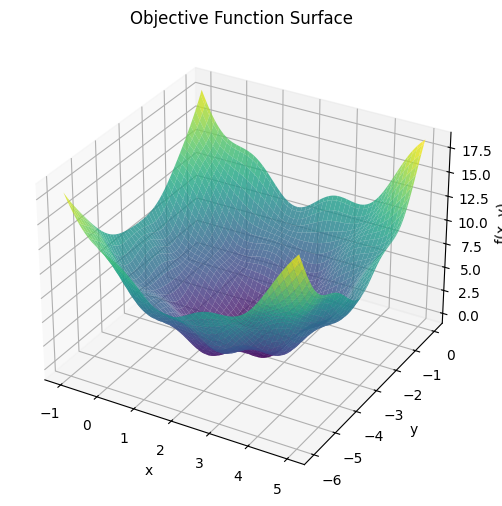

In [12]:
# Generate meshgrid for plotting
x_vals = np.linspace(-1, 5, 100)
y_vals = np.linspace(-6, 0, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f([X, Y])

# Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.8)
ax.set_title('Objective Function Surface')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.show()

In [13]:
from scipy.optimize import minimize

**Optimization Goal:**

$$
\begin{aligned}
& \underset{x,\ y}{\text{minimize}} && f(x, y) = (x - 2)^2 + (y + 3)^2 + \sin(3x) \cos(3y) \\
& \text{subject to} && x + y + 2\geq 0 \\
& && 0 \leq x \leq 5 \\
& && -6 \leq y \leq 0
\end{aligned}
$$


In [14]:
# Inequality constraint: x + y ≥ -2 → -x - y ≤ 2
constraints = [
    {'type': 'ineq', 'fun': lambda X: X[0] + X[1] + 2}
]

# Bounds: x in [0, 5], y in [-6, 0]
bounds = [(0, 5), (-6, 0)]

# Initial guess
x0 = np.array([0.5, -5])

# Solve
result = minimize(f, x0, method='SLSQP', bounds=bounds, constraints=constraints)

# Print result
print("Optimal x, y:", result.x)
print("Minimum value:", result.fun)
print("Success:", result.success)
print("Message:", result.message)

Optimal x, y: [ 2.50348753 -3.11454384]
Minimum value: -0.6718569749090724
Success: True
Message: Optimization terminated successfully
